In [1]:
# Pandas - Data manipulation and analysis library
import pandas as pd
# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

from scipy import stats

import seaborn as sns
# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv("test.csv")

In [3]:
df_test.head(10)

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,42979,35.56,4.31,5.07,4.60,-0.033333,0.040000,66.29,3.77,4.07,...,3.640000,346.301200,345.379600,17.481600,27.721600,4159.000000,12.437500,45.203200,4/1/2021,9/8/2019
1,14911,31.26,4.76,27.40,29.60,-0.076667,-0.060000,49.57,3.63,44.06,...,2.826087,356.218261,357.305652,17.479130,27.650435,4163.608696,34.818182,45.129565,4/1/2021,9/13/2019
2,48386,30.08,5.07,4.76,4.74,0.013333,-0.016667,52.96,5.16,4.05,...,1.266667,368.532667,366.844667,11.361333,16.739333,4176.133333,15.888889,28.100667,4/1/2021,10/10/2019
3,18822,33.31,32.79,5.09,4.96,0.000000,0.003333,49.26,68.54,5.83,...,0.937500,352.899375,352.595000,17.168750,27.460625,4159.875000,12.750000,44.629375,4/1/2021,10/13/2019
4,49810,4.44,30.03,5.57,5.02,-0.200000,-0.030000,4.16,54.80,4.52,...,1.200000,363.912800,365.208400,14.860000,23.980800,4168.400000,7.500000,38.840800,4/1/2021,10/19/2019
5,23495,4.79,4.81,5.17,5.04,0.563333,0.570000,4.22,3.53,5.26,...,4.388889,379.857222,376.187778,12.028889,18.162222,4181.833333,43.142857,30.191111,4/1/2021,10/19/2019
6,30555,11.10,4.79,38.98,33.02,-0.053333,-0.136667,20.07,4.13,66.06,...,1.705882,348.604706,344.696471,18.921176,29.258824,4150.764706,68.300000,48.180000,4/1/2021,9/5/2019
7,18316,17.81,4.80,6.49,32.50,-0.080000,-0.013333,25.22,4.18,5.20,...,1.500000,340.917000,338.649000,9.545000,11.992000,4166.800000,6.800000,21.537000,4/1/2021,10/8/2019
8,17929,34.18,18.53,5.93,4.97,0.050000,-0.100000,64.79,29.69,5.29,...,2.700000,352.557000,351.049500,14.267500,22.292500,4157.850000,23.900000,36.560000,4/1/2021,8/8/2019
9,33374,31.38,5.00,40.57,6.18,0.140000,0.010000,61.09,4.66,82.55,...,1.136364,353.581364,350.668636,16.425000,28.009545,4160.409091,17.000000,44.434545,4/1/2021,9/20/2019


In [4]:
df_test.shape

(4500, 54)

['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2', 'avg_time_charging_lag3', 'avg_time_charging_lag7', 'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1', 'avg_time_discharging_lag2', 'avg_time_discharging_lag3', 'avg_time_discharging_lag7', 'discharging_rate_lag3', 'discharging_rate_lag7', 'avg_time_charging_lag4', 'avg_time_discharging_lag4', 'avg_time_charging_lag5', 'avg_time_discharging_lag5', 'avg_time_charging_lag6', 'avg_time_discharging_lag6', 'avg_time_charging_lag8', 'avg_time_discharging_lag8', 'avg_time_charging_lag9', 'avg_time_discharging_lag9', 'avg_time_charging_lag10', 'avg_time_discharging_lag10', 'avg_time_charging_lag11', 'avg_time_discharging_lag11', 'avg_time_charging_lag12', 'avg_time_discharging_lag12', 'avg_time_charging_lag13', 'avg_time_discharging_lag13', 'avg_time_charging_lag14', 'avg_time_discharging_lag14', 'discharging_rate_lag4', 'discharging_rate_lag5', 'discharging_rate_lag6', 'discharging_rate_lag8', 'charging_rat

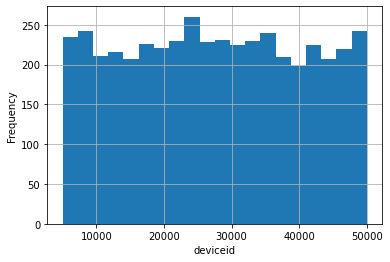

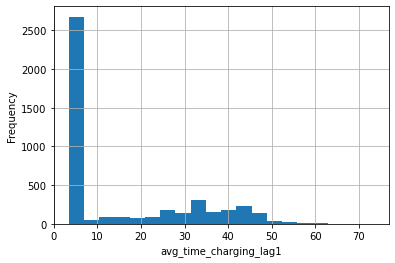

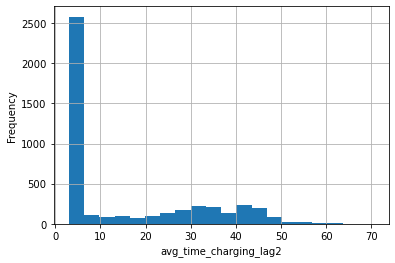

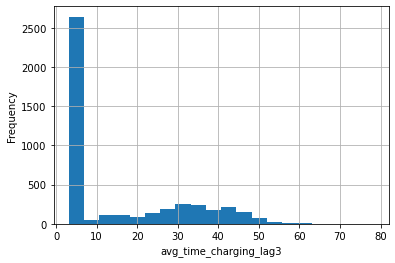

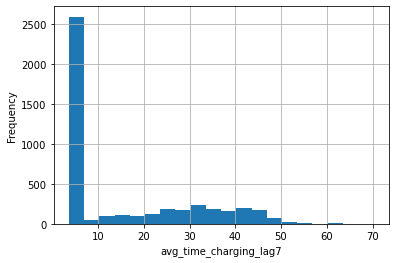

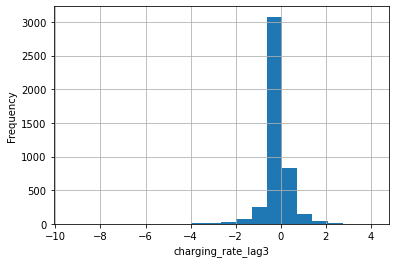

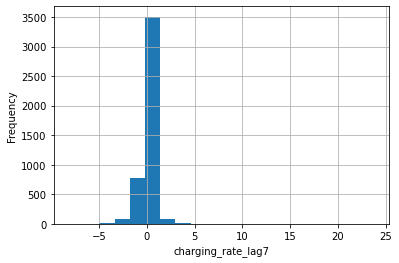

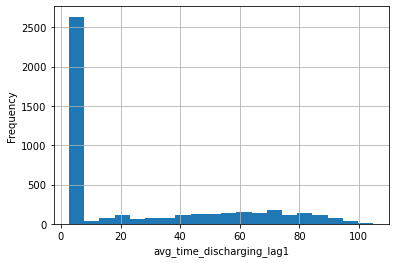

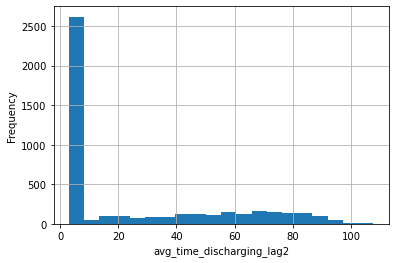

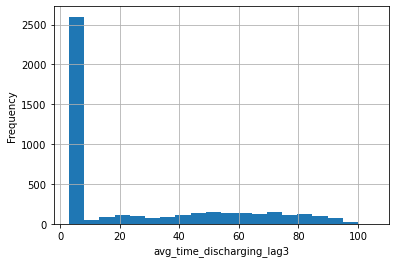

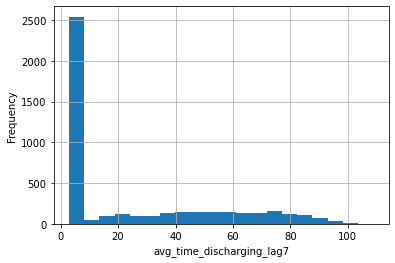

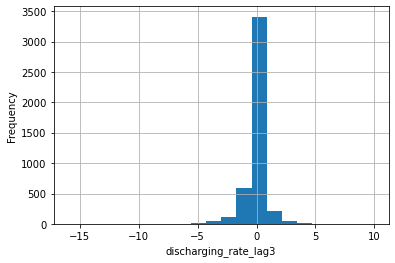

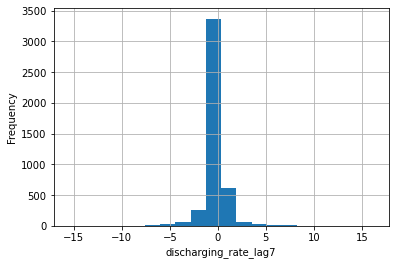

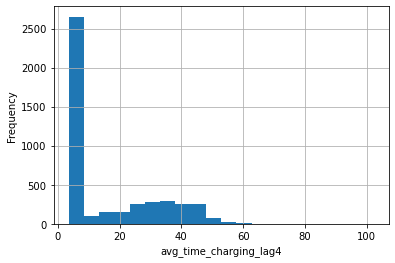

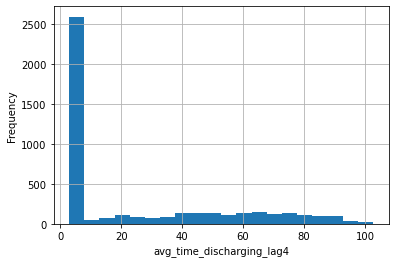

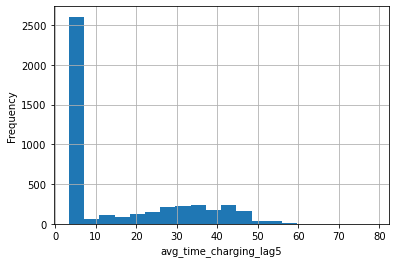

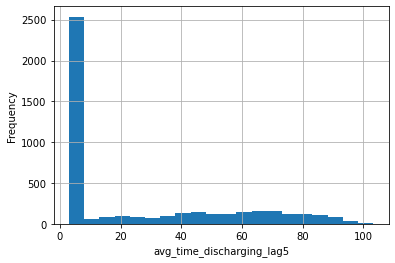

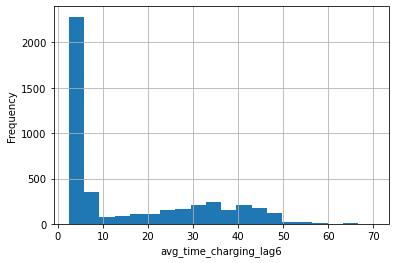

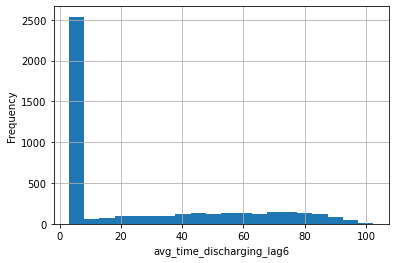

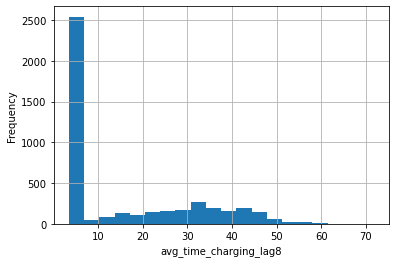

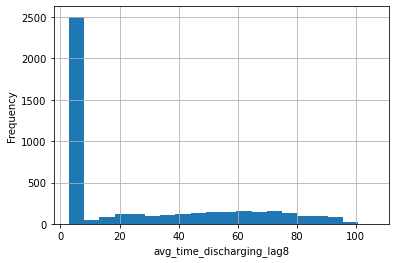

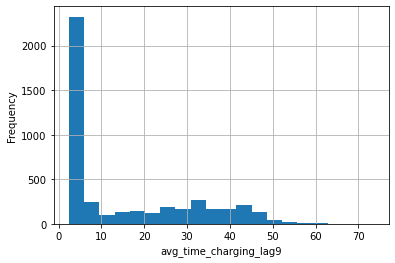

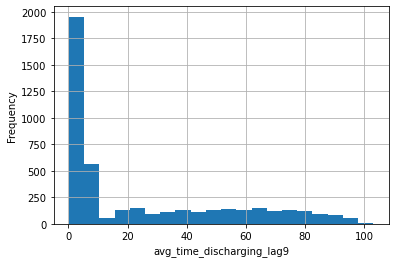

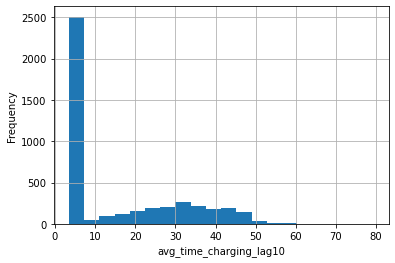

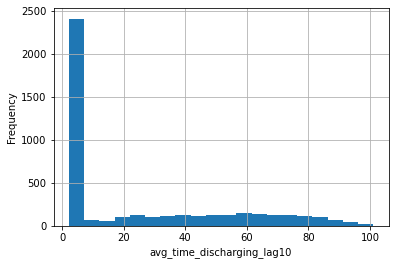

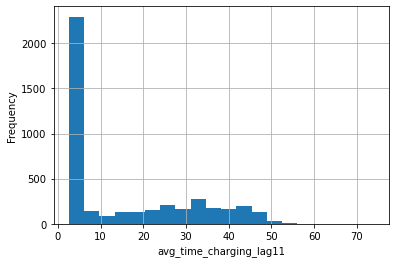

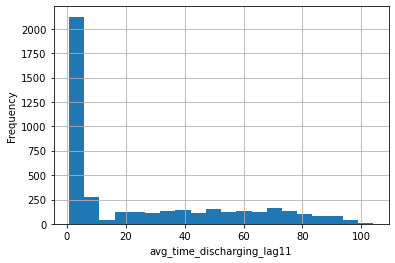

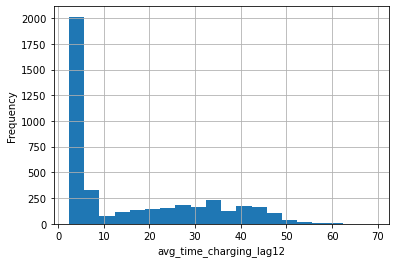

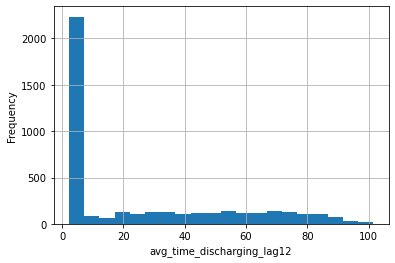

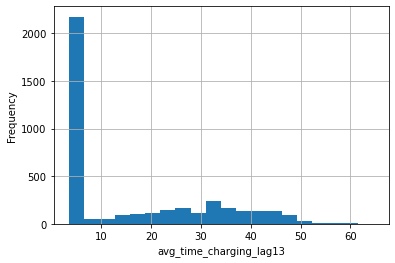

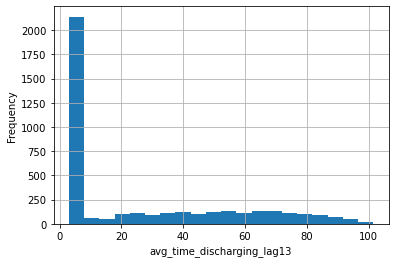

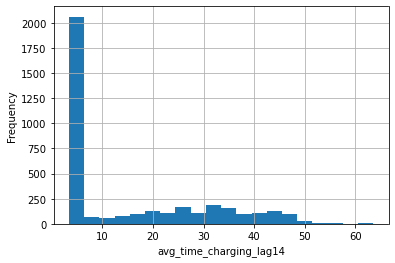

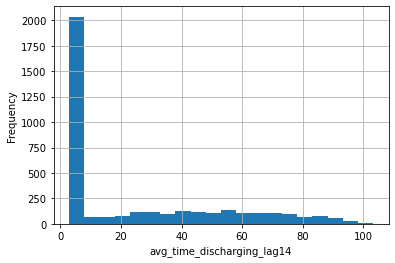

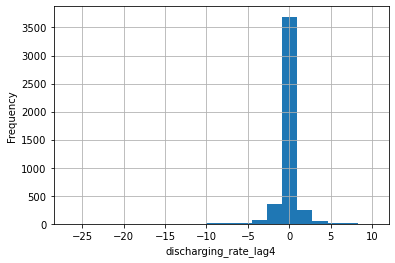

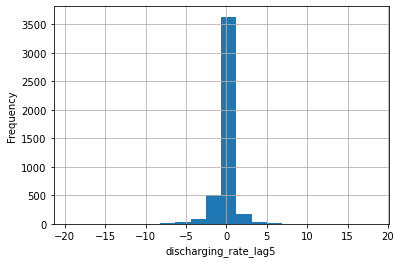

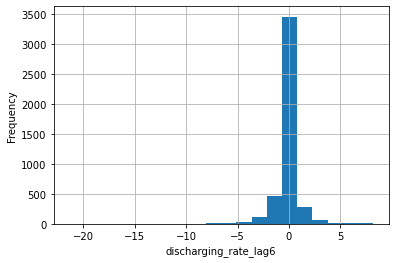

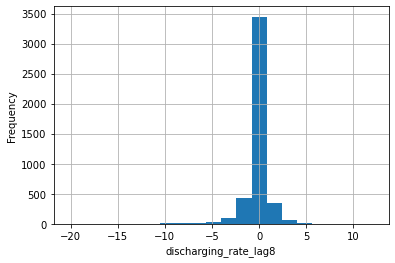

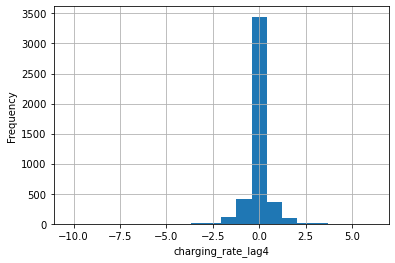

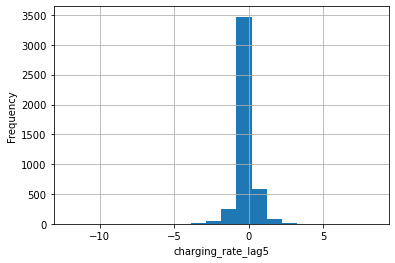

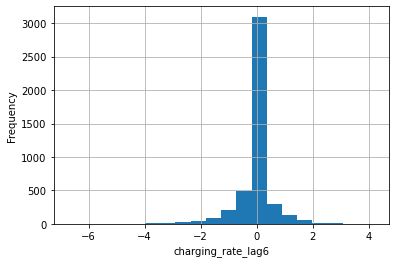

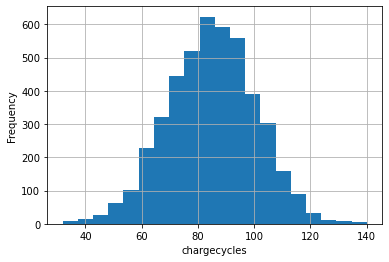

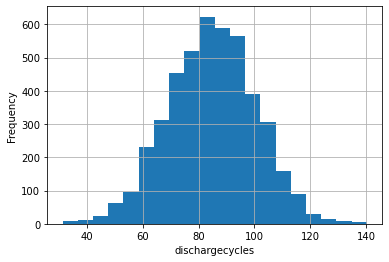

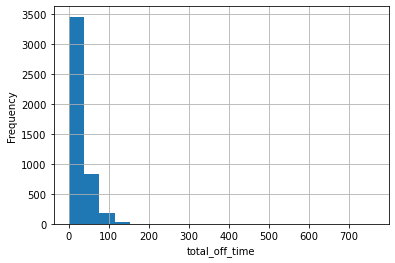

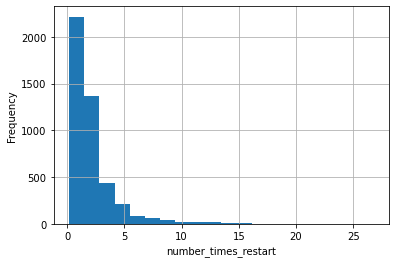

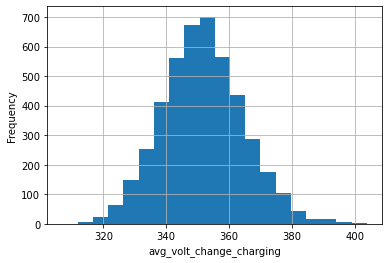

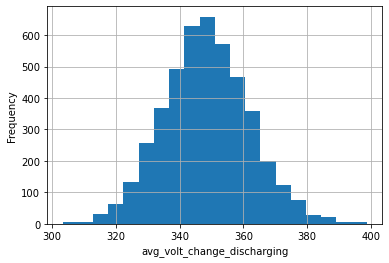

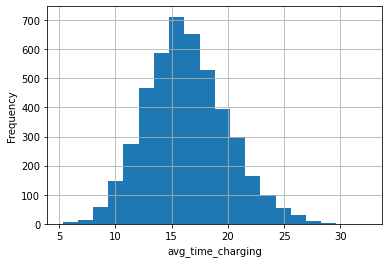

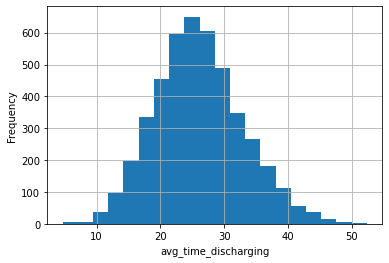

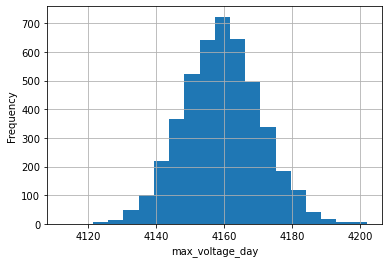

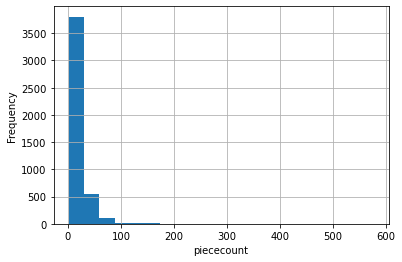

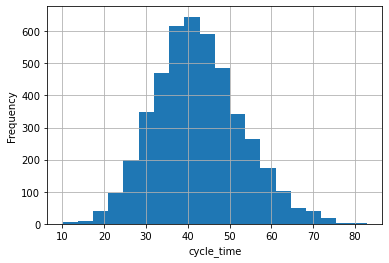

In [5]:
Num_cols=df_test.select_dtypes(include=np.number).columns.tolist()
print(Num_cols)
for i in Num_cols:
    df_test[i].hist(bins = 20)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
def find_outliers(col):
    z=np.abs(stats.zscore(col))
    idx_outliers=np.where(z>3, True,False)
    return pd.Series(idx_outliers,index=col.index)

idx=find_outliers(df_test['avg_time_charging_lag1'])
idx

0       False
1       False
2       False
3       False
4       False
        ...  
4495    False
4496    False
4497    False
4498    False
4499    False
Length: 4500, dtype: bool

In [7]:
display(df_test.loc[idx==True].describe().round(3))

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
count,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000,...,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000
mean,24132.143,66.343,19.929,10.980,8.177,0.206,0.066,66.561,33.124,13.806,...,80.276,14.341,2.772,344.831,342.195,19.366,29.503,4154.454,13.424,48.869
std,14789.820,3.516,18.395,16.330,8.990,0.135,0.550,7.876,34.958,25.765,...,9.918,18.997,2.962,12.011,14.235,2.462,4.599,13.837,8.010,7.016
min,5217.000,63.240,4.450,4.460,4.410,0.003,-0.310,57.540,4.040,3.460,...,71.048,0.000,0.737,324.972,317.136,16.060,22.241,4133.684,7.000,38.301
25%,15631.500,63.955,4.540,4.730,4.490,0.123,-0.213,62.060,4.220,3.910,...,73.537,0.658,1.143,340.380,336.952,17.832,26.626,4146.167,7.770,44.459
50%,21595.000,65.280,8.060,4.840,4.890,0.177,-0.083,63.670,10.230,4.220,...,77.867,1.333,1.400,344.726,345.217,19.539,30.601,4152.190,10.900,50.234
75%,31093.500,67.345,37.115,5.045,5.205,0.330,0.002,70.010,63.595,4.455,...,83.840,27.868,3.090,351.363,349.699,20.628,32.562,4166.319,16.493,53.143
max,48663.000,73.280,43.680,48.010,28.550,0.357,1.277,80.580,81.970,72.230,...,98.263,42.000,8.800,360.633,359.715,23.045,35.299,4170.333,27.545,58.345


In [8]:
display(df_test.loc[idx==False].describe().round(3))
df_test=df_test.loc[idx==False]

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
count,4493.000,4493.000,4493.000,4493.000,4490.000,4493.000,4492.000,4493.000,4493.000,4493.000,...,4493.000,4493.000,4493.000,4493.000,4493.000,4493.000,4493.000,4493.000,4493.000,4493.000
mean,27399.673,16.401,16.399,16.285,16.293,-0.051,-0.054,26.128,26.249,25.761,...,84.751,24.750,2.211,351.620,348.450,16.329,26.064,4159.409,21.131,42.393
std,12970.586,15.453,15.436,15.218,14.944,0.596,0.884,29.554,29.686,28.944,...,15.677,31.726,2.229,12.979,13.490,3.607,6.896,11.501,19.959,10.460
min,5004.000,3.470,3.040,3.160,3.650,-9.397,-8.183,2.680,3.000,2.890,...,31.250,0.000,0.154,307.028,303.365,5.309,4.657,4112.500,1.667,10.043
25%,16472.000,4.920,4.900,4.930,4.910,-0.067,-0.110,4.200,4.210,4.210,...,74.200,3.688,1.059,342.872,339.312,13.840,21.336,4151.550,11.500,35.205
50%,27256.000,5.780,5.770,5.860,5.810,0.000,-0.003,5.820,5.870,5.930,...,85.125,16.810,1.500,351.321,348.020,16.105,25.658,4159.444,16.455,41.838
75%,38364.000,31.090,30.530,30.200,29.225,0.043,0.063,51.700,50.830,49.570,...,95.333,36.300,2.444,359.945,357.388,18.600,30.435,4166.947,24.100,48.989
max,49990.000,63.120,70.400,78.190,70.150,4.100,23.700,104.840,107.680,105.130,...,140.278,761.071,26.750,403.796,398.686,32.354,52.353,4202.056,576.000,82.824


In [10]:
df_outliers=pd.DataFrame()
for col in df_test.describe().columns:
    df_outliers[col]=find_outliers(df_test[col])
df_outliers.head()

<ipython-input-6-b6e1dbb947fb>:3: RuntimeWarning: invalid value encountered in greater
  idx_outliers=np.where(z>3, True,False)


,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
test_outs=df_outliers.apply(lambda x:np.any(x),axis=1)
print(len(test_outs),df_outliers.shape)
test_outs

4493 (4493, 51)


0       False
1       False
2       False
3       False
4        True
        ...  
4495    False
4496    False
4497    False
4498     True
4499    False
Length: 4493, dtype: bool

In [12]:
np.sum(test_outs)

816

In [14]:
df_clean=df_test.loc[idx==False]
df_clean.describe

<bound method NDFrame.describe of       deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
0        42979                   35.56                    4.31   
1        14911                   31.26                    4.76   
2        48386                   30.08                    5.07   
3        18822                   33.31                   32.79   
4        49810                    4.44                   30.03   
...        ...                     ...                     ...   
4495     23329                   30.25                    4.75   
4496     35263                    5.29                    4.57   
4497     12544                    4.94                    6.49   
4498     44502                    5.49                    4.65   
4499     16821                   42.41                    5.37   

      avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
0                       5.07                    4.60           -0.033333   
1                    